In [72]:
import pandas as pd
import numpy as np
from ast import literal_eval

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

def count_categories(data, x):
    
    df = data.groupby(x)['URL'].count().reset_index()
    
    fig = px.bar(df, y = x, x = 'URL', title = 'Categories of ' + str(x), width = 750, height = 500,
                 labels = {'URL' : '# of listings'})
    fig.update_layout(showlegend=False, yaxis = {'tickfont' : {'size' : 9}})
    fig.update_yaxes(visible = True, showticklabels = True, title = None, categoryorder = 'total ascending')
    fig.show()
    
def distribution_numerics(data, x):
    
    fig = px.histogram(data,nbins = 50, x = x, title = 'Distribution of ' + str(x), width = 750, height = 450)
    fig.update_layout(showlegend=False)
    fig.update_traces(marker_line_width = 1/3,marker_line_color = 'white')
    fig.update_yaxes(visible = True, showticklabels = True, title = None)
    fig.show()
    
def plot_corr():
    
    fig, ax = plt.subplots(figsize = (14, 6))
    sns.heatmap(data[numeric_columns].corr(), ax = ax, cmap = 'coolwarm', center = 0, 
                annot = True, fmt = '.2g', annot_kws={'size' : 8})
    plt.title('Correlations\n')
    plt.show()
    
    
def distribution_numerics_sns(data, i):
    
    if i not in ['Évjárat', 'Szállítható szem. száma', 'Ajtók száma', 'Műszaki vizsga érvényes', 'Szín - metál']:
        
        plt.figure(figsize = (9, 4))
        sns.distplot(data[i], kde = False, bins = 40, 
                     hist_kws = {'edgecolor' : 'black', 'linewidth' : 1})

        plt.title('Distribution of ' + i)
        plt.xlabel(None)
        plt.ylabel(None)
        plt.show()  
        
    else:
        
        plt.figure(figsize = (9, 4))
        sns.countplot(data[i], color = '#89bedc', edgecolor = 'black', linewidth = 1/2)

        plt.title('Distribution of ' + i)
        plt.xlabel(None)
        plt.xticks(rotation=90)
        plt.ylabel(None)
        plt.show()
        
def scatter_sns(data, x, y):
    plt.figure(figsize = (9, 5))
    sns.scatterplot(data = data, x = x, y = y, size = 3/4, edgecolor = 'k', linewidth = 1/3, color = 'blue', legend = False)
    plt.title('Relationship between ' + x + ' and ' + y)
    plt.show()  
    
    

BOXPLOT_PROPS = {
    'boxprops':{'edgecolor':'black', 'linewidth' : 1},
    'flierprops':{'markerfacecolor':'black', 'markeredgecolor':'black', 'marker' : 'x'},
    'medianprops':{'color':'black', 'linewidth' : 1},
    'whiskerprops':{'color':'black', 'linewidth' : 1},
    'capprops':{'color':'black', 'linewidth' : 1}
}

def boxplot_sns_price(data, y, xlim = 30000000):   

    order = data.loc[:,['Vételár', y]].groupby([y]).median().sort_values('Vételár', ascending = False)

    plt.figure(figsize = (10, 5))
    sns.boxplot(data = data, y = y, x = 'Vételár', color = 'lightblue', fliersize = 3, 
                **BOXPLOT_PROPS, order = order.index)
    plt.xlabel('Vételár HUF (10m HUF)')
    plt.ylabel(None)
    plt.xlim(0, xlim)
    #plt.ticklabel_format(style='plain', axis='x',useOffset=False)
    plt.title('Distribution of asking price with regards to ' + y)
    plt.show()

In [2]:
%%time

data = pd.read_csv('data/autok_final_cleaned.csv.gz', compression = 'gzip')

Wall time: 2.66 s


### Value counts of categorical features

In [3]:
categoricals = ['Állapot', 'Kivitel', 'Üzemanyag', 'Hajtás', 'Sebességváltó fajtája', 'Okmányok jellege', 'Kategória', 'Márka', 'Szín', 'Klíma fajtája']

In [4]:
for i in categoricals:
    count_categories(data, i)

There are only 2 EVs

In [5]:
data = data[data['Üzemanyag'] != 'Elektromos']

### Distributions of numeric features

In [6]:
numeric_columns = data.select_dtypes(exclude = 'O').columns.tolist()

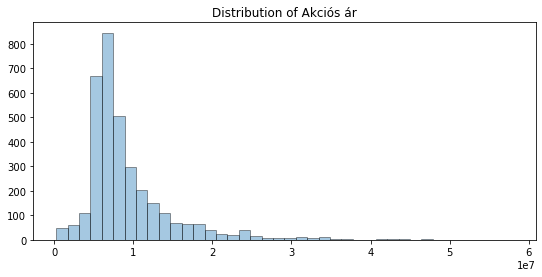

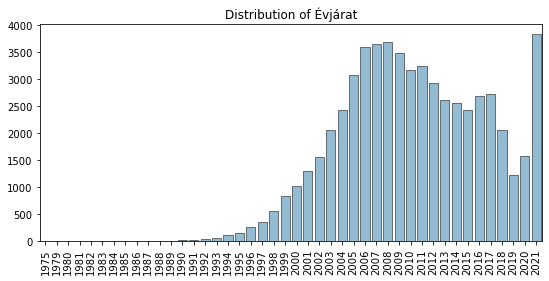

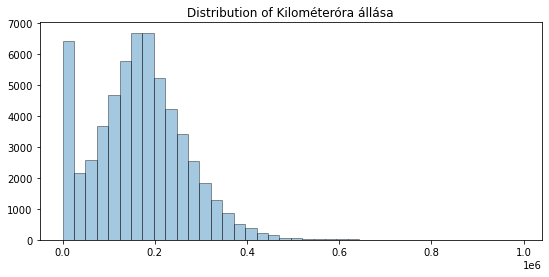

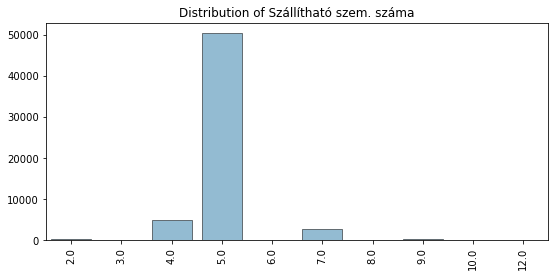

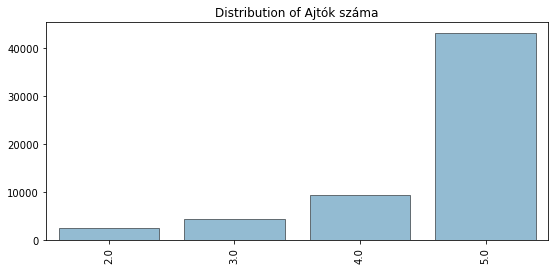

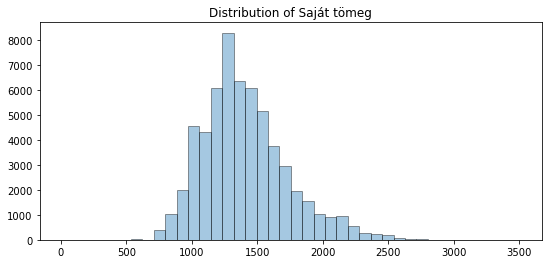

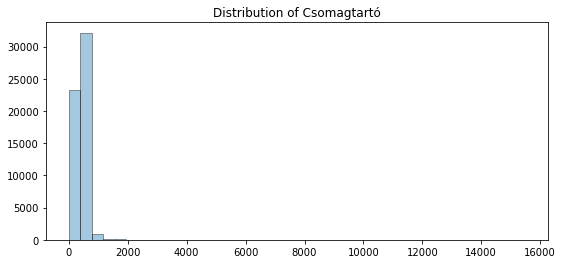

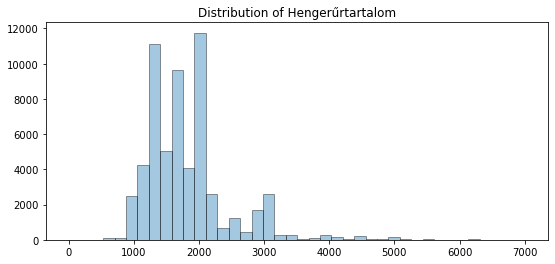

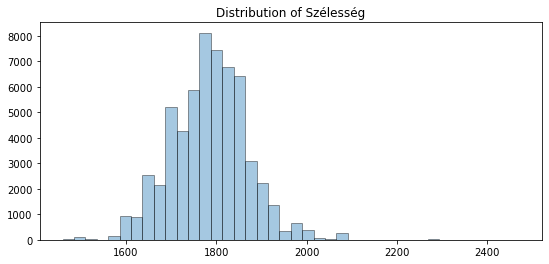

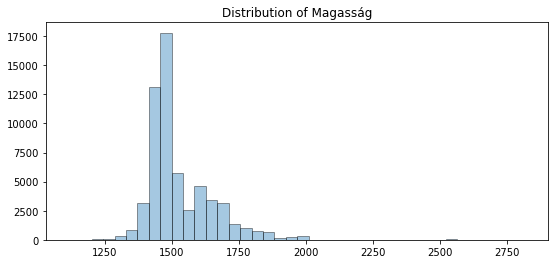

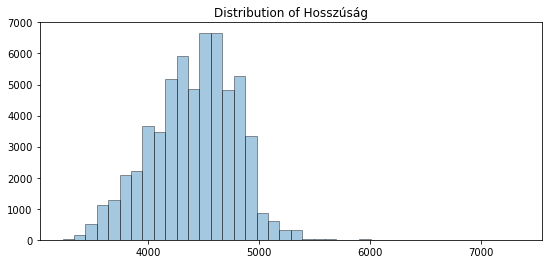

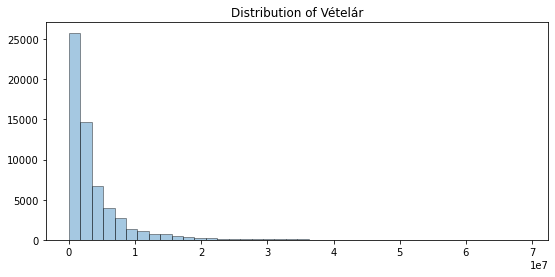

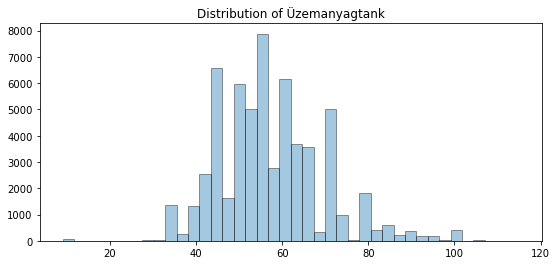

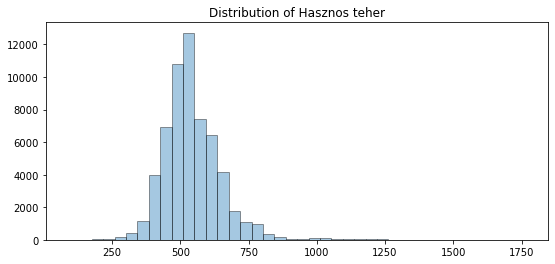

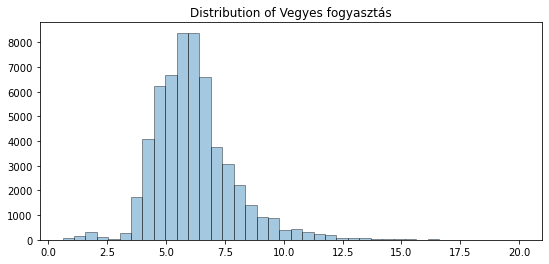

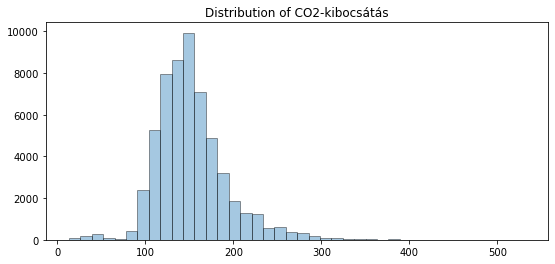

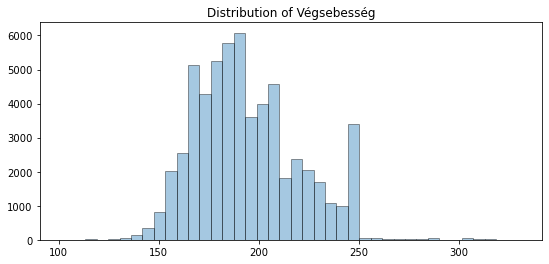

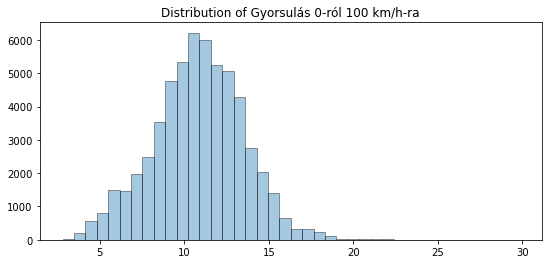

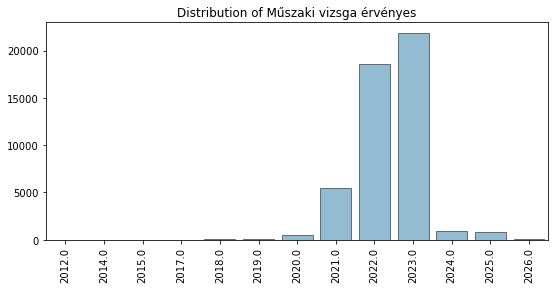

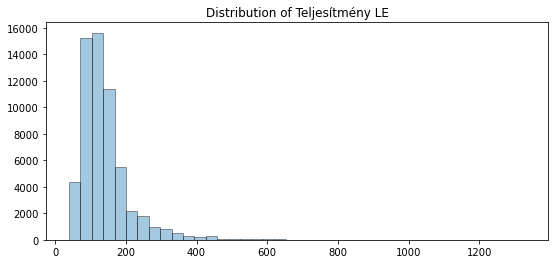

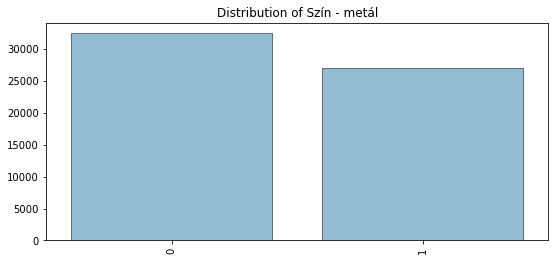

In [7]:
for i in numeric_columns:
    distribution_numerics_sns(data, i)

### Correlation among numeric features

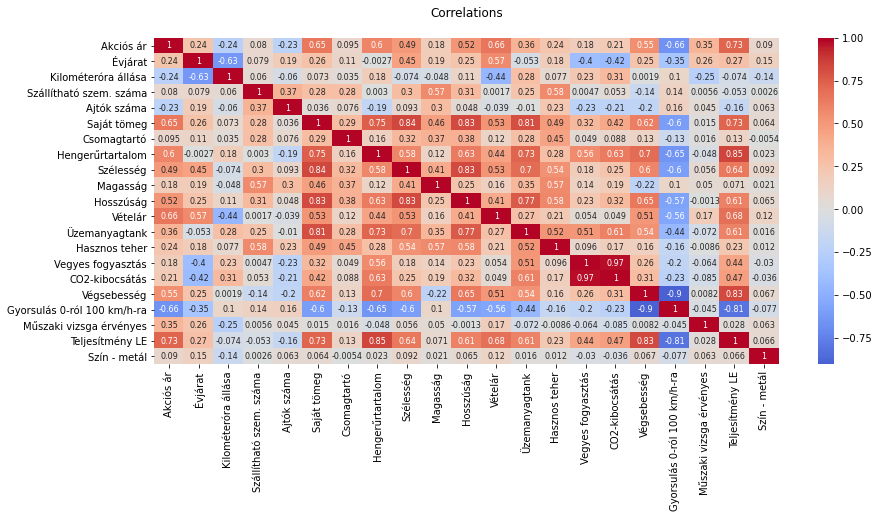

In [12]:
plot_corr()

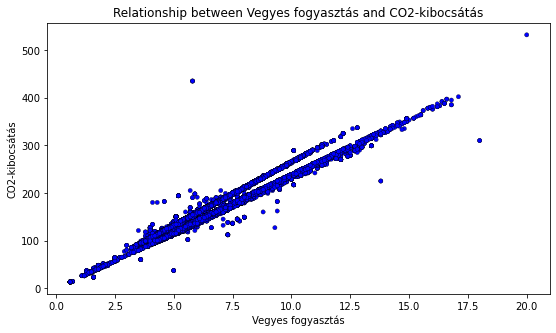

In [29]:
scatter_sns(data, 'Vegyes fogyasztás', 'CO2-kibocsátás')

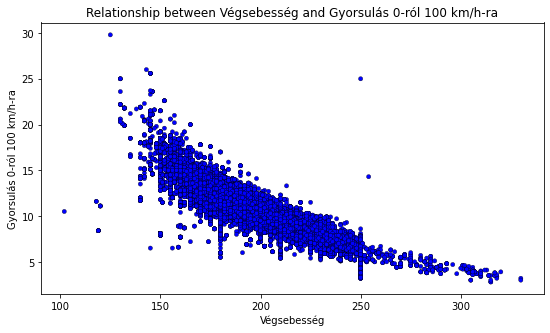

In [30]:
scatter_sns(data, 'Végsebesség', 'Gyorsulás 0-ról 100 km/h-ra')

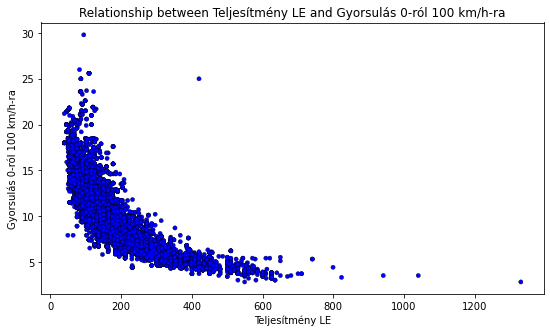

In [38]:
scatter_sns(data, 'Teljesítmény LE', 'Gyorsulás 0-ról 100 km/h-ra')

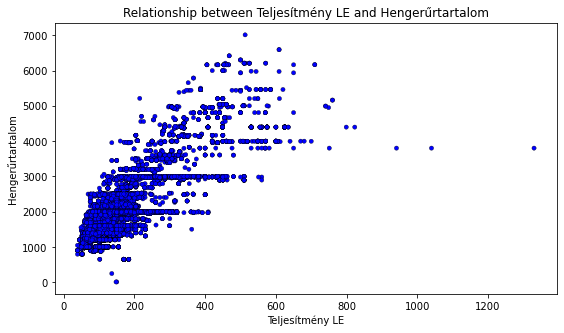

In [40]:
scatter_sns(data, 'Teljesítmény LE', 'Hengerűrtartalom')

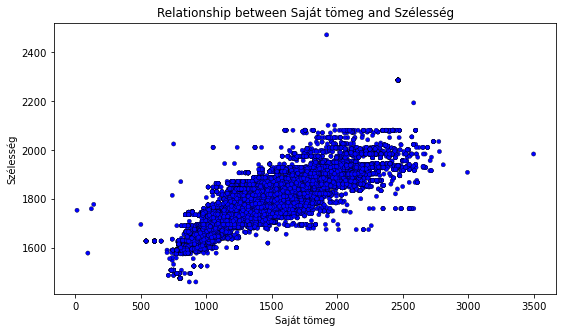

In [46]:
scatter_sns(data, 'Saját tömeg', 'Szélesség')

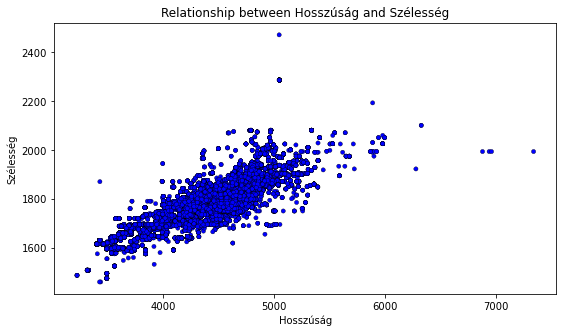

In [48]:
scatter_sns(data, 'Hosszúság', 'Szélesség')

Remove before modeling
- Gyorsulás 0-ról 100 km/h-ra
- CO2-kibocsátás
- Hengerűrtartalom

### Relationships with Price (Vételár)

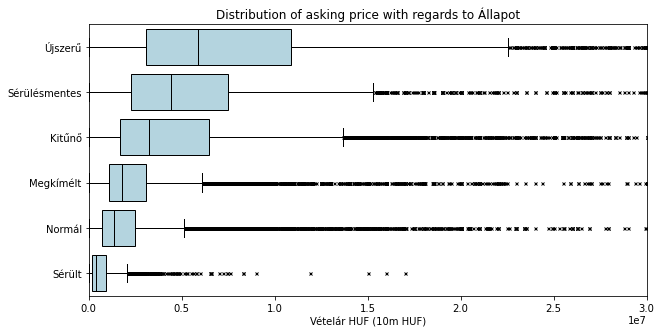

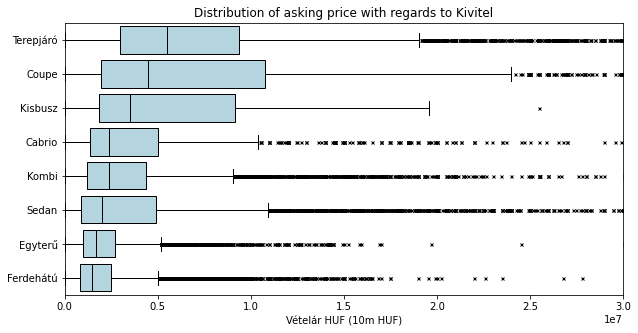

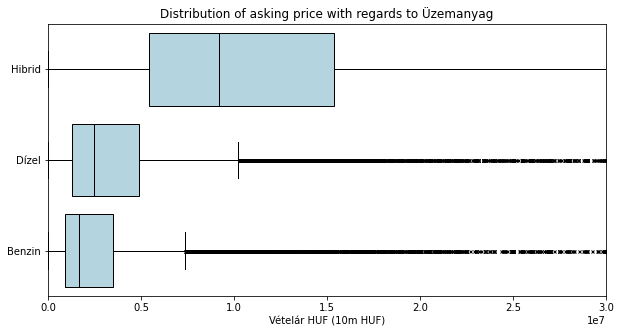

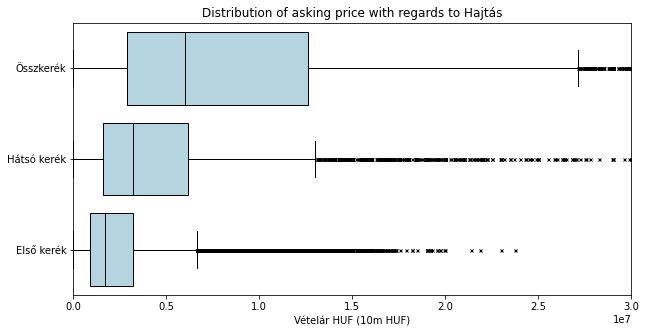

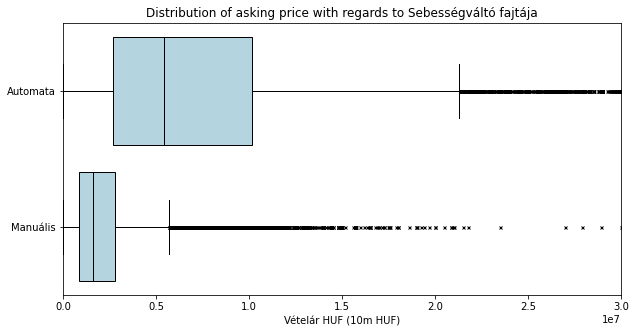

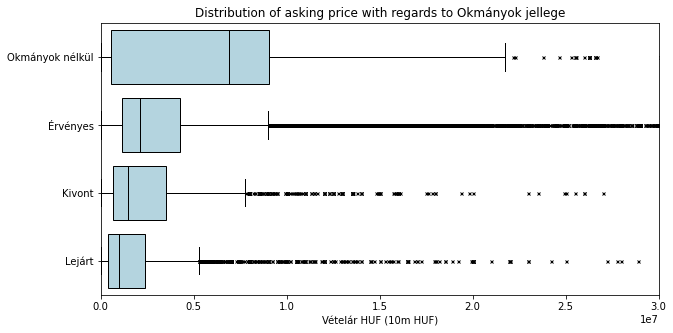

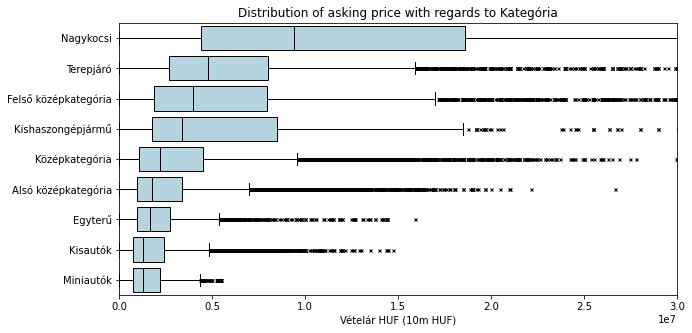

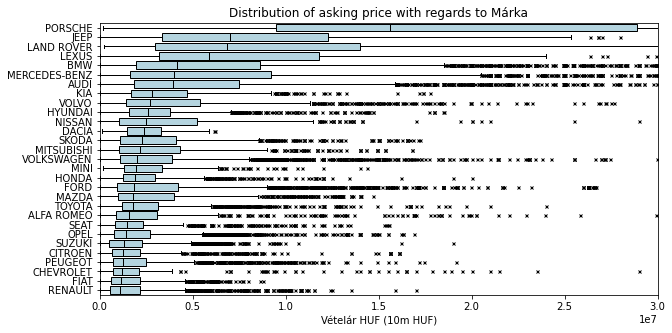

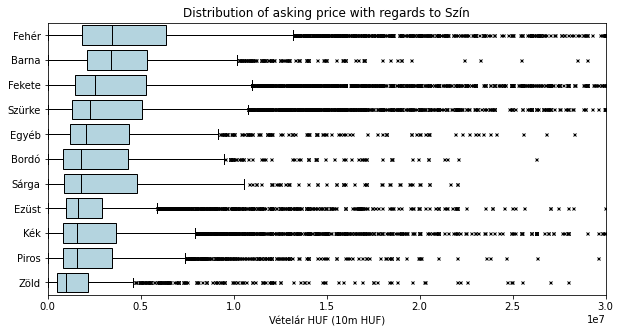

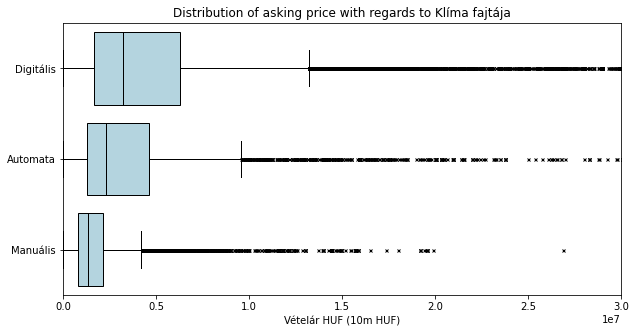

In [69]:
for i in categoricals:
    boxplot_sns_price(data, i)

In [70]:
numeric_columns

['Akciós ár',
 'Évjárat',
 'Kilométeróra állása',
 'Szállítható szem. száma',
 'Ajtók száma',
 'Saját tömeg',
 'Csomagtartó',
 'Hengerűrtartalom',
 'Szélesség',
 'Magasság',
 'Hosszúság',
 'Vételár',
 'Üzemanyagtank',
 'Hasznos teher',
 'Vegyes fogyasztás',
 'CO2-kibocsátás',
 'Végsebesség',
 'Gyorsulás 0-ról 100 km/h-ra',
 'Műszaki vizsga érvényes',
 'Teljesítmény LE',
 'Szín - metál']

In [ ]:
# todo turn some numerics into categories
# todo visualize price and feat relationship (boxplot and scatterplots)
# todo wordcloud on felszereltseg features
#